# Classic Mean Risk Optimization

source: https://riskfolio-lib.readthedocs.io/en/latest/examples.html

## 1.1. Import Libs

## 1.2. Downloading the data

In [139]:
# Dat range
start = '2024-05-01'
end = '2024-05-28'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start =start, end = end)
data =data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [140]:
# Calculating returns

Y = data[assets].pct_change().dropna()
display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-02,-4.3279%,4.3100%,-8.5027%,-1.1536%,0.4188%,0.2729%,0.7907%,2.1832%,0.6847%,0.4630%,...,1.4235%,0.1128%,1.4530%,8.8162%,-0.5910%,1.0804%,-0.6504%,0.7078%,-0.6888%,2.1277%
2024-05-03,0.2742%,0.5256%,-0.0542%,0.6636%,0.8603%,0.1701%,-2.2009%,1.2628%,0.8590%,2.6831%,...,0.1404%,-1.5687%,0.6934%,0.6871%,0.1784%,-0.0506%,0.1978%,0.2577%,-0.1028%,2.1067%
2024-05-06,2.2556%,-0.8009%,-1.0301%,-0.2046%,-0.5169%,-0.4414%,0.0000%,0.2195%,0.8517%,1.6031%,...,0.7708%,0.3435%,1.2906%,1.7629%,0.8309%,0.1962%,0.2044%,1.5306%,1.1314%,0.1834%
2024-05-07,1.1364%,-0.9195%,-1.0682%,0.3189%,0.0000%,0.9550%,0.6239%,0.9282%,-0.0352%,1.7040%,...,1.0083%,1.3790%,1.4897%,1.5647%,0.5297%,1.3009%,-0.1186%,0.6789%,-0.0509%,0.2517%
2024-05-08,0.8262%,2.0599%,-1.0244%,-0.8402%,1.4549%,-0.4730%,-0.3322%,-0.0370%,3.6255%,1.2101%,...,-1.1360%,0.4221%,-1.5300%,1.7882%,0.1756%,-0.5112%,0.1344%,-0.8801%,0.4325%,0.7304%


# 2. Estimating Mean variance Portfolios
## 2.1. Calculating the portfolio that maximizes Sharpe ratio

In [141]:
# Estimating Mean variance Portfolios
# Calculating the portfolio that maximizes Sharpe ratio

import riskfolio as rp

# Building the portfolio object
port =rp.Portfolio(returns=Y)

# Calculating optimal portfolio

#select method and estimate inout paramenters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio

model = 'Classic' # Could be Classic (historical), BL (Black Letterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # use historical scenarios for risk measures. that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is  'Utility'

w = port.optimization(model=model, rm=rm,obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

You must convert self.cov to a positive definite matrix


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,7.5342%,0.0000%,14.6016%,0.0000%,0.0000%,37.1043%,...,0.0000%,3.5657%,0.0000%,3.3578%,27.6077%,0.8386%,0.0000%,0.0000%,0.0000%,0.0000%


## 2.2. Plotting portfolio composition

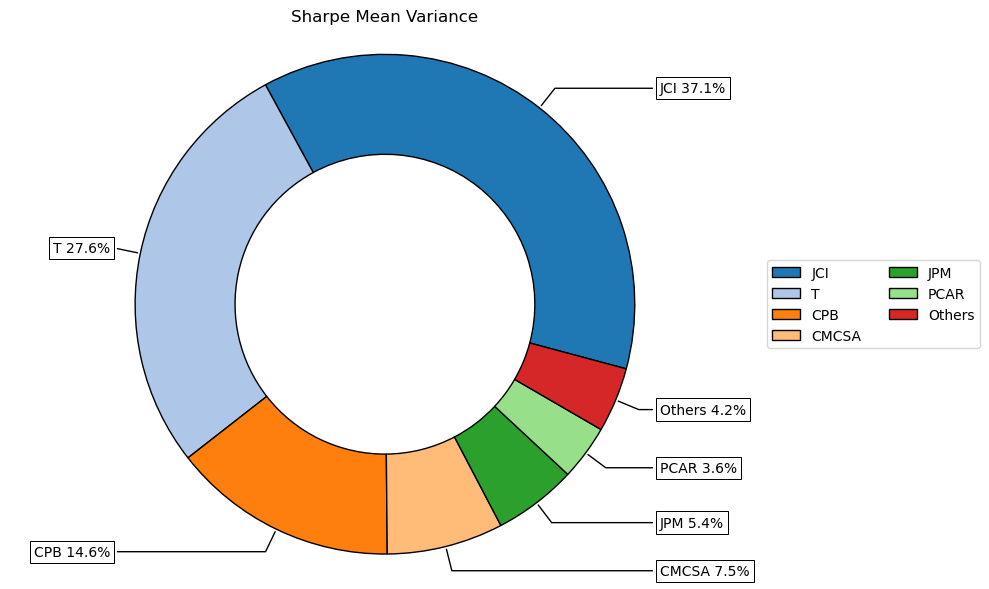

In [142]:
# Plotting portfolio composition

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=3, cmap = 'tab20',
                height=6, width=10, ax=None)

## 2.3. Calculate efficient frontier

In [143]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,0.0000%,16.7074%,0.0000%,11.5898%,0.0000%,0.0000%,17.7845%,...,0.0000%,8.9933%,0.0000%,0.0000%,29.8351%,5.3835%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,0.0000%,0.0000%,13.1789%,0.0000%,13.0768%,0.0000%,0.0000%,26.7976%,...,0.0000%,6.8018%,0.0000%,0.9862%,28.9237%,3.5276%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,11.5408%,0.0000%,13.3894%,0.0000%,0.0000%,30.7020%,...,0.0000%,5.7168%,0.0000%,1.8680%,29.0968%,2.6456%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,9.9317%,0.0000%,13.8485%,0.0000%,0.0000%,33.4690%,...,0.0000%,4.8215%,0.0000%,2.5079%,28.6175%,1.8982%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,8.4491%,0.0000%,14.3142%,0.0000%,0.0000%,35.7165%,...,0.0000%,4.0449%,0.0000%,3.0333%,27.9935%,1.2432%,0.0000%,0.0000%,0.0000%,0.0000%


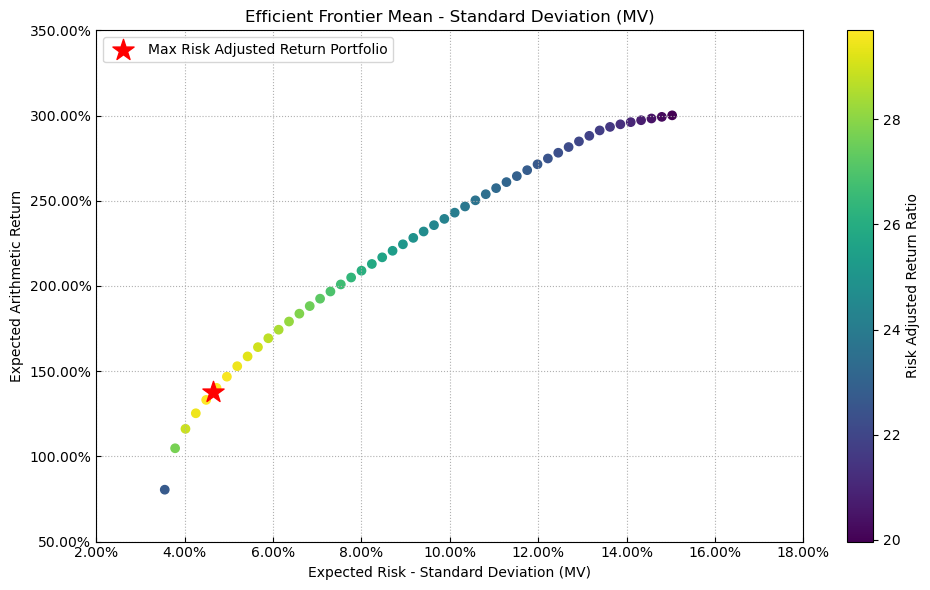

In [144]:
# Plottong the effiecnt frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov =port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax =rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                    rf=rf,alpha=0.05, cmap='viridis', w=w, label=label,
                    marker='*', s=16,c='r',height=6, width=10, ax=None)

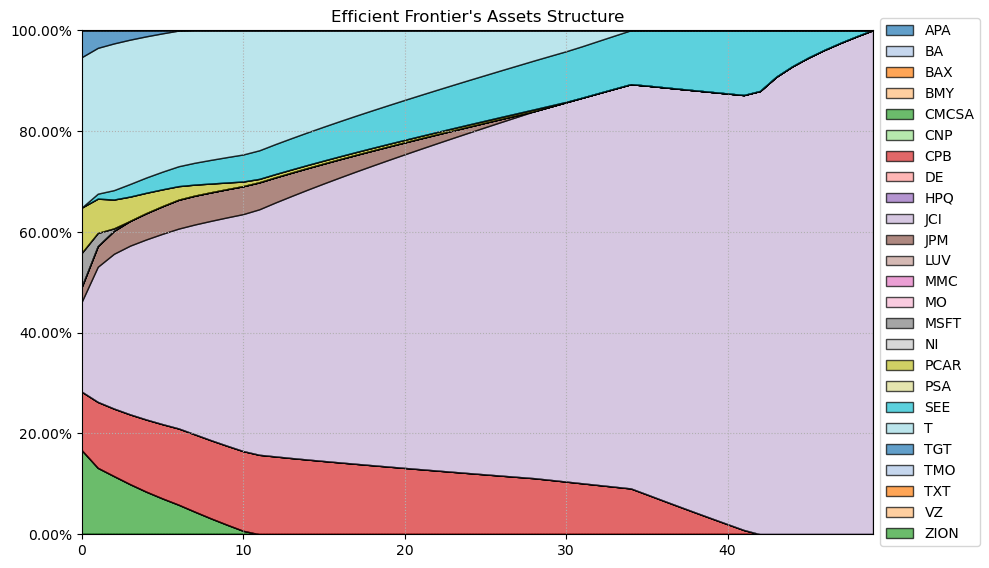

In [145]:
# Plotting effiecient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap='tab20',height=6, width=10, ax=None)

# 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

## 3.1. Calculating the portfolio that maximizes Return/CVaR ratio.

In [146]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,6.0643%,0.0000%,7.1546%,0.0000%,0.0000%,61.7887%,...,0.0000%,17.0530%,0.0000%,0.0000%,0.0000%,7.9394%,0.0000%,0.0000%,0.0000%,0.0000%


## 3.2 Plotting portfolio composition

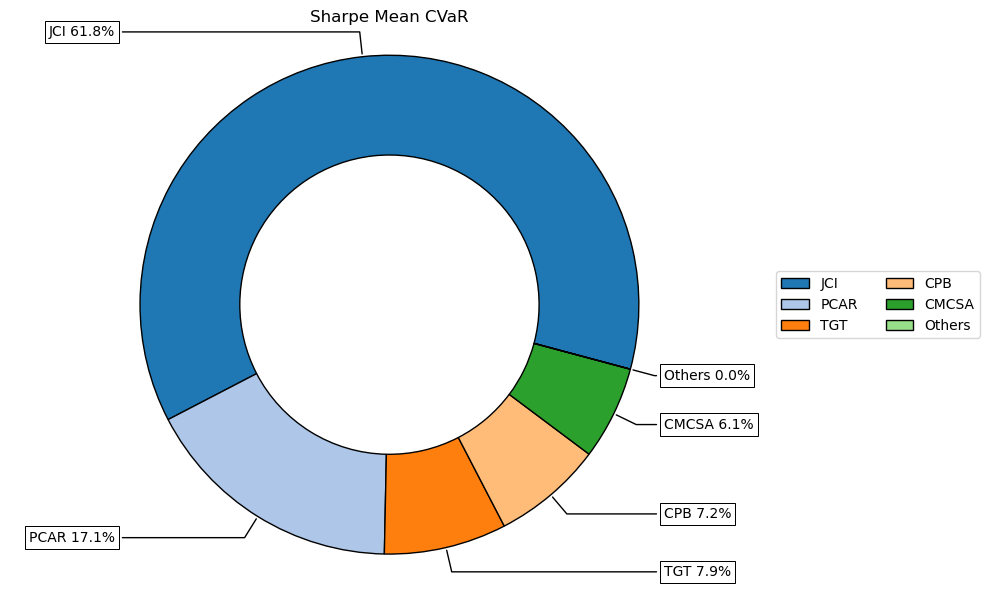

In [147]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=3, cmap = "tab20",
                 height=6, width=10, ax=None)

## 3.3 Calculate efficient frontier

In [148]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,0.0000%,12.9976%,0.0000%,0.0000%,0.0000%,0.0000%,74.9194%,...,0.0000%,7.6486%,0.0000%,0.0000%,0.0000%,4.4344%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,0.0000%,0.0000%,12.6297%,0.0000%,0.0000%,0.0000%,0.0000%,76.7325%,...,0.0000%,7.1124%,0.0000%,0.0000%,0.0000%,3.5255%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,12.2618%,0.0000%,0.0000%,0.0000%,0.0000%,78.5455%,...,0.0000%,6.5761%,0.0000%,0.0000%,0.0000%,2.6165%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,11.8939%,0.0000%,0.0000%,0.0000%,0.0000%,80.3586%,...,0.0000%,6.0399%,0.0000%,0.0000%,0.0000%,1.7076%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,11.5260%,0.0000%,0.0000%,0.0000%,0.0000%,82.1717%,...,0.0000%,5.5037%,0.0000%,0.0000%,0.0000%,0.7986%,0.0000%,0.0000%,0.0000%,0.0000%


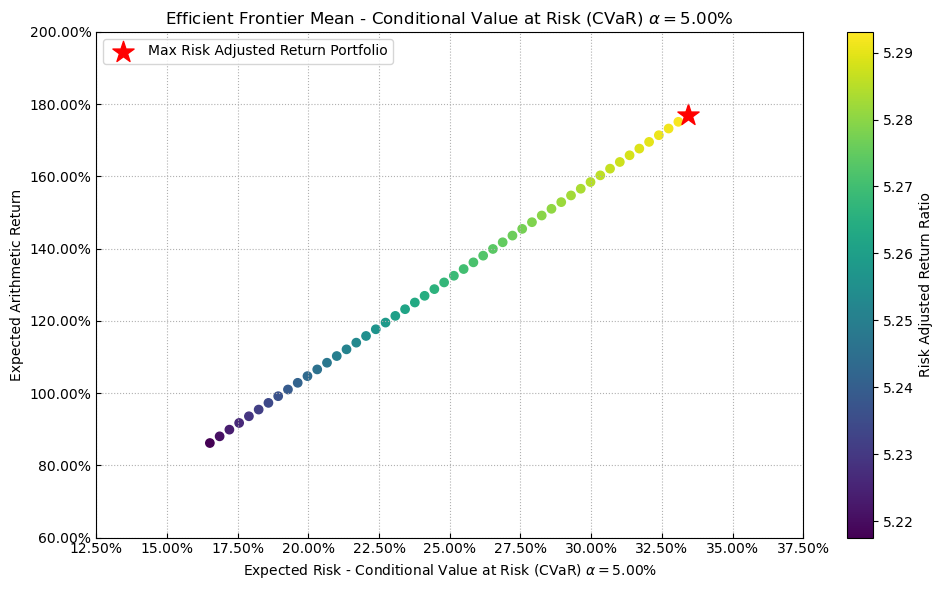

In [126]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

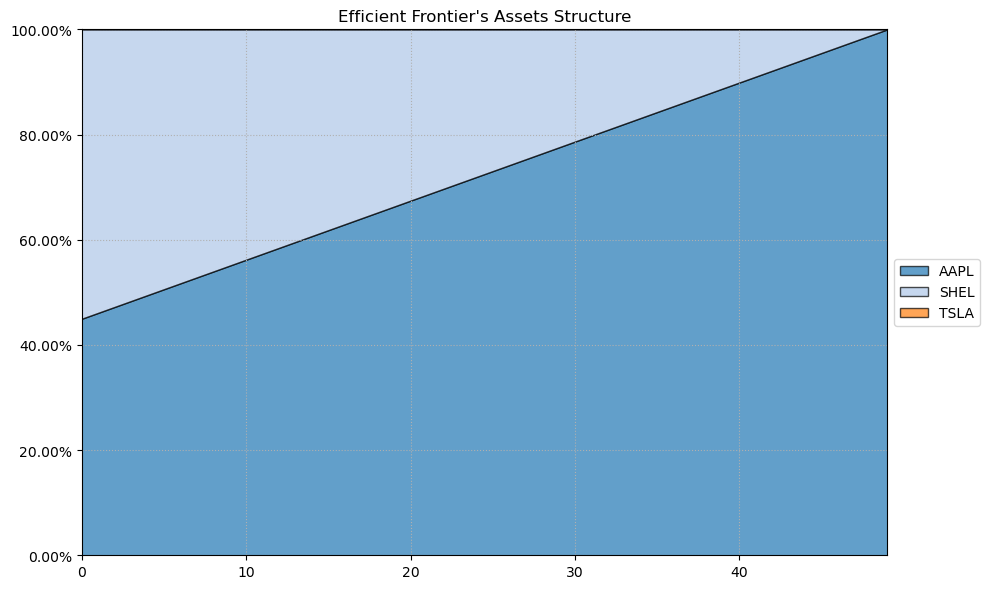

In [127]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [154]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [155]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.20%,0.17%,0.00%,0.00%,0.00%,0.13%,0.20%,0.19%,0.12%,0.17%
BA,0.00%,0.00%,0.00%,0.10%,0.08%,0.00%,0.00%,0.00%,0.07%,0.10%,0.10%,0.06%,0.09%
BAX,0.00%,0.00%,0.00%,0.46%,0.35%,0.00%,0.00%,0.00%,0.29%,0.38%,0.37%,0.30%,0.23%
BMY,0.00%,0.00%,0.00%,0.26%,0.23%,0.00%,0.00%,0.00%,0.17%,0.27%,0.22%,0.15%,0.23%
CMCSA,7.53%,7.18%,12.72%,5.30%,6.17%,6.06%,6.06%,6.06%,4.15%,5.42%,4.38%,5.43%,7.16%
CNP,0.00%,0.00%,0.00%,0.25%,0.19%,0.00%,0.00%,0.00%,0.12%,0.24%,0.21%,0.13%,0.21%
CPB,14.60%,19.99%,13.88%,2.17%,1.85%,7.15%,7.15%,7.15%,2.59%,1.44%,3.31%,2.02%,0.55%
DE,0.00%,0.00%,0.00%,0.14%,0.14%,0.00%,0.00%,0.00%,0.09%,0.16%,0.13%,0.08%,0.19%
HPQ,0.00%,0.00%,0.00%,0.43%,0.25%,0.00%,0.00%,0.00%,0.24%,0.48%,0.35%,0.21%,0.26%
JCI,37.10%,26.88%,42.21%,62.23%,64.72%,61.79%,61.79%,61.79%,31.58%,64.45%,46.70%,33.79%,73.39%


<Axes: >

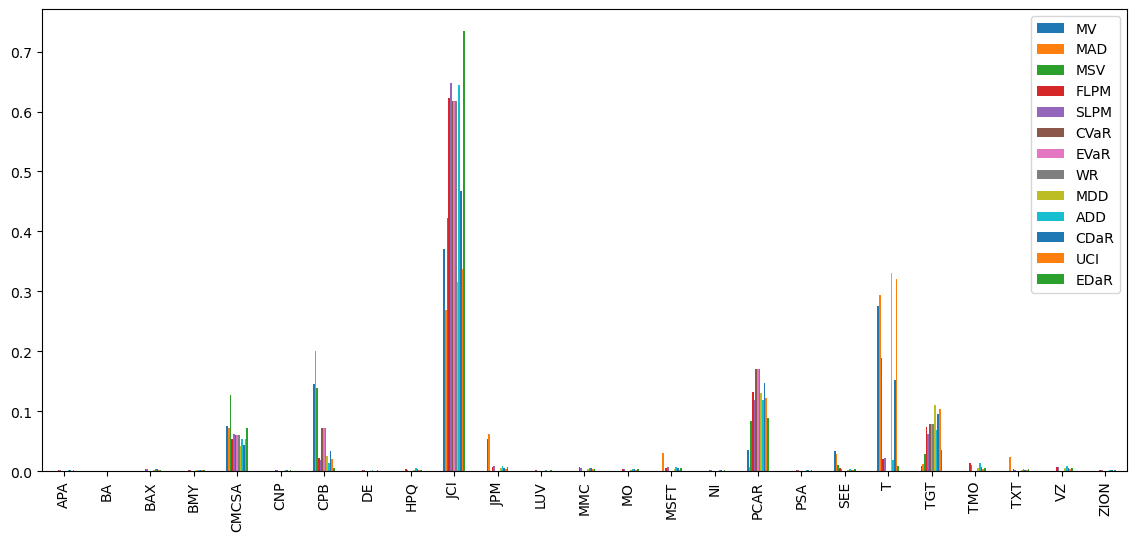

In [156]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

# 4. Constraints on Assets and Assets Classes
## 4.1. Creating the constraints
In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [157]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [158]:
A, B = rp.assets_constraints(constraints, asset_classes)

## 4.2. Optimize the portfolio with the constraints

In [159]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

,weights
APA,0.0000%
BA,0.0000%
BAX,0.0000%
BMY,0.0000%
CMCSA,10.0000%
CNP,0.0000%
CPB,10.0000%
DE,0.0000%
HPQ,10.0000%
JCI,10.0000%


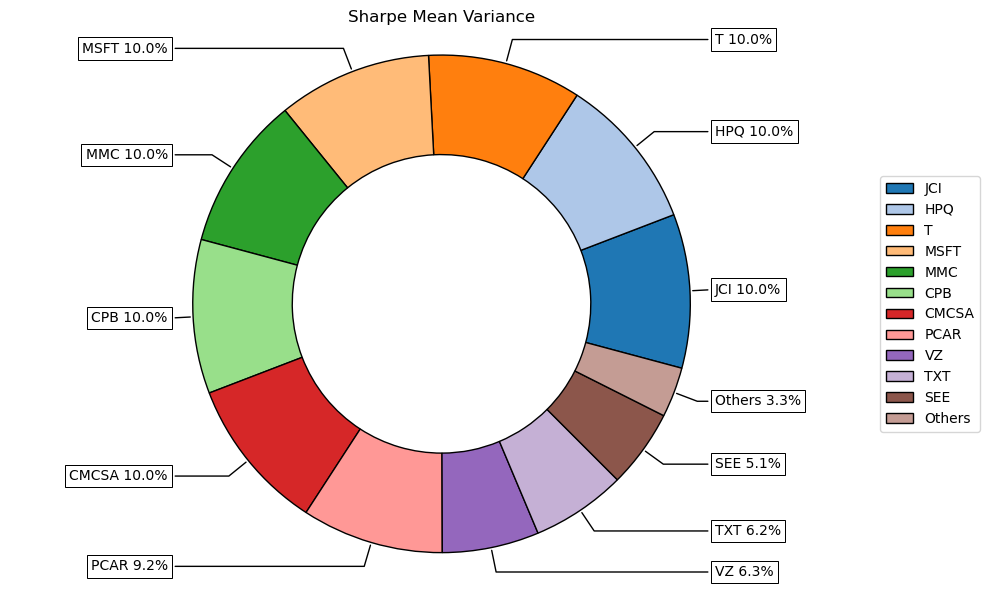

In [160]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [161]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
APA,Energy,0.0000%
BA,Financials,0.0000%
BAX,Health Care,0.0000%
BMY,Health Care,0.0000%
CMCSA,Consumer Discretionary,10.0000%
CNP,Utilities,0.0000%
CPB,Consumer Staples,10.0000%
DE,Industrials,0.0000%
HPQ,Information Technology,10.0000%
JCI,Consumer Discretionary,10.0000%


In [162]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,20.0000%
Consumer Staples,10.0000%
Energy,0.0000%
Financials,13.2528%
Health Care,0.0000%
Industrials,15.3725%
Information Technology,20.0000%
Materials,5.0843%
Telecommunications Services,16.2905%


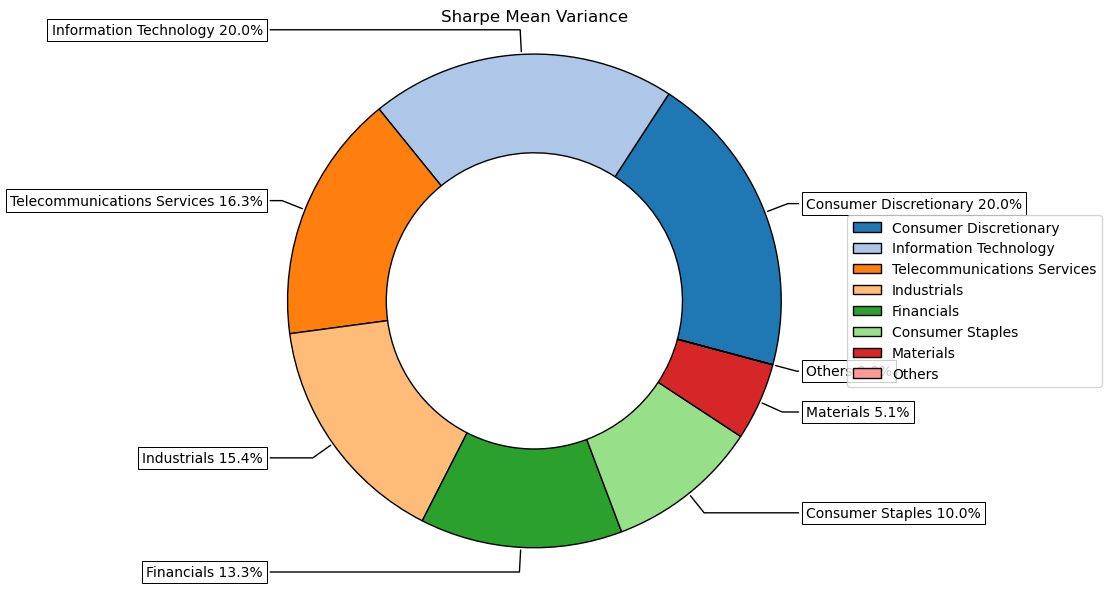

In [163]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)